<a href="https://colab.research.google.com/github/Zubairahmad09/Differential-Analysis---Web-Storage/blob/main/A_comprehensive_Evaluation_of_Tracking_Protection_Mechanisms_For_Web_Storage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Modern web applications increasingly make use of different mechanisms to identify and authenticate users on the internet. The more the web application logic is pushed from the server to the client, however, the more sensitive data have to be handled at the client side rather than at the server side. Unfortunately, the traditional approach to handle client-side storage on the Web, i.e., HTTP cookies suffer from significant shortcomings: cookies are limited in size, have an unconventional semantics and are inconvenient to access programmatically. The HTML5 standard thus introduced the Web Storage API, which retains the intuitive flavor of cookies, while addressing their most relevant shortcomings.



In order to detect and mitigate the tracking behavior of client-side storage on the Web, various countermeasures have been developed in the form of browser extensions or even protection mechanisms that are integrated directly in the browser. To evaluated the effectiveness of these defense mechanism, we will analyze the tracking behavior of the web storage across different browsers and anti-tracking extensions. A differential analysis will be conducted to automatically evaluate the enforcement of the policies in different browsers and extensions imposed to the tracking behavior of the web storage.

# Research Questions

• What is the behavior of the current tracking prevention techniques in modern browsers to detect and mitigate tracking involving web storage?


• What is the behavior of the anti-tracking chrome extensions to detect and mitigate tracking involving web storage?


• How the websites bypass the tracking prevention techniques and anti-tracking extensions in case of web storage?

# List of Browsers and Extensions

Broswer names and versions:

        Chrome : Version 108.0.5359.124
        Firefox: Version 
        Safari:  Version 15.2
        Brave:   Version 147.186


Extension names and versions (Only in case of Chrome):

        Ghostery:        Version 8.9.8
        Disconnect:      Version 20.3.1.1
        Dockduckgo:      Version 2023.1.12
        Privacypagder:   Version 2022.9.27
        scripsafe:       Version 1.0.9.3

Note: The selection list is based on number of users. 

# Framework

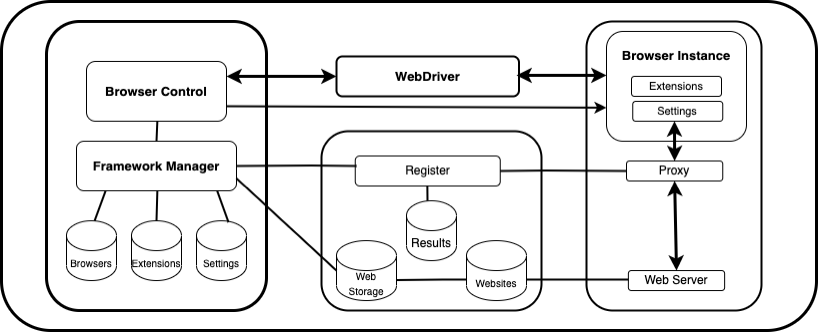

# Data Collection

We collect the 'key' and 'value' of the cookie, Local Storage and Session Storage and HTML content for the all the websites visiting four browsers mentioned above. A similar framework has been established to collect the same range of data from cookies, Local Storage and Session Storage in case of different extensions enforced in Chrome. 



# CASE:1

To check how many times a specific Broswer is being populated for the total number of  DISTINCT redirect_urls in case of cookie, local_storage, session_storage.

QUERY:



    -- SELECT user_agent,
    -- COUNT(DISTINCT redirect_url) AS url_visited_count,
    -- SUM(CASE WHEN type = 'cookie' THEN 1 ELSE 0 END) AS cookie_count,
    -- SUM(CASE WHEN type = 'local_storage' THEN 1 ELSE 0 END) AS local_storage_count,
    -- SUM(CASE WHEN type = 'session_storage' THEN 1 ELSE 0 END) AS session_storage_count
    -- FROM requests
    -- JOIN items ON requests.id = items.request_id
    -- WHERE user_agent IN ('chrome','firefox','safari', 'brave')
    -- GROUP BY user_agent;



This is a SQL query that retrieves data from two tables (requests and items) and aggregates the data based on the user agent. The query returns the following information for each of the user agents (chrome, firefox, safari, and brave):

- url_visited_count: the count of unique redirect URLs visited by the user agent, calculated using COUNT(DISTINCT redirect_url).

- cookie_count, local_storage_count, session_storage_count: the sum of the number of items stored in the browser (cookies, local storage, and session storage, respectively) by the user agent, calculated using SUM and a CASE statement.

The data is filtered by the user_agent column and only includes user agents in the list ('chrome','firefox','safari', 'brave'). The final result is grouped by the user_agent column.

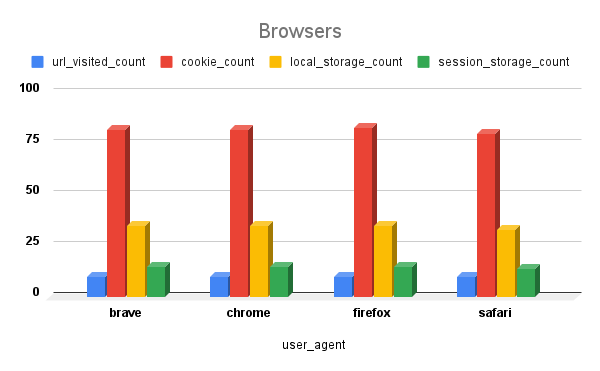

# CASE:2

To check how many times a Extension (in case of chrome) is being populated for the total number of DISTINCT redirect_urls in case of cookie, local_storage, session_storage.

QUERY:



    -- SELECT user_agent,
    -- COUNT(DISTINCT redirect_url) AS url_visited_count,
    -- SUM(CASE WHEN type = 'cookie' THEN 1 ELSE 0 END) AS cookie_count,
    -- SUM(CASE WHEN type = 'local_storage' THEN 1 ELSE 0 END) AS local_storage_count,
    -- SUM(CASE WHEN type = 'session_storage' THEN 1 ELSE 0 END) AS session_storage_count
    -- FROM requests
    -- JOIN items ON requests.id = items.request_id
    -- WHERE user_agent IN ('Ghostery','Disconnect','Dockduckgo', 'Privacypagder', 'scripsafe')
    -- GROUP BY user_agent;




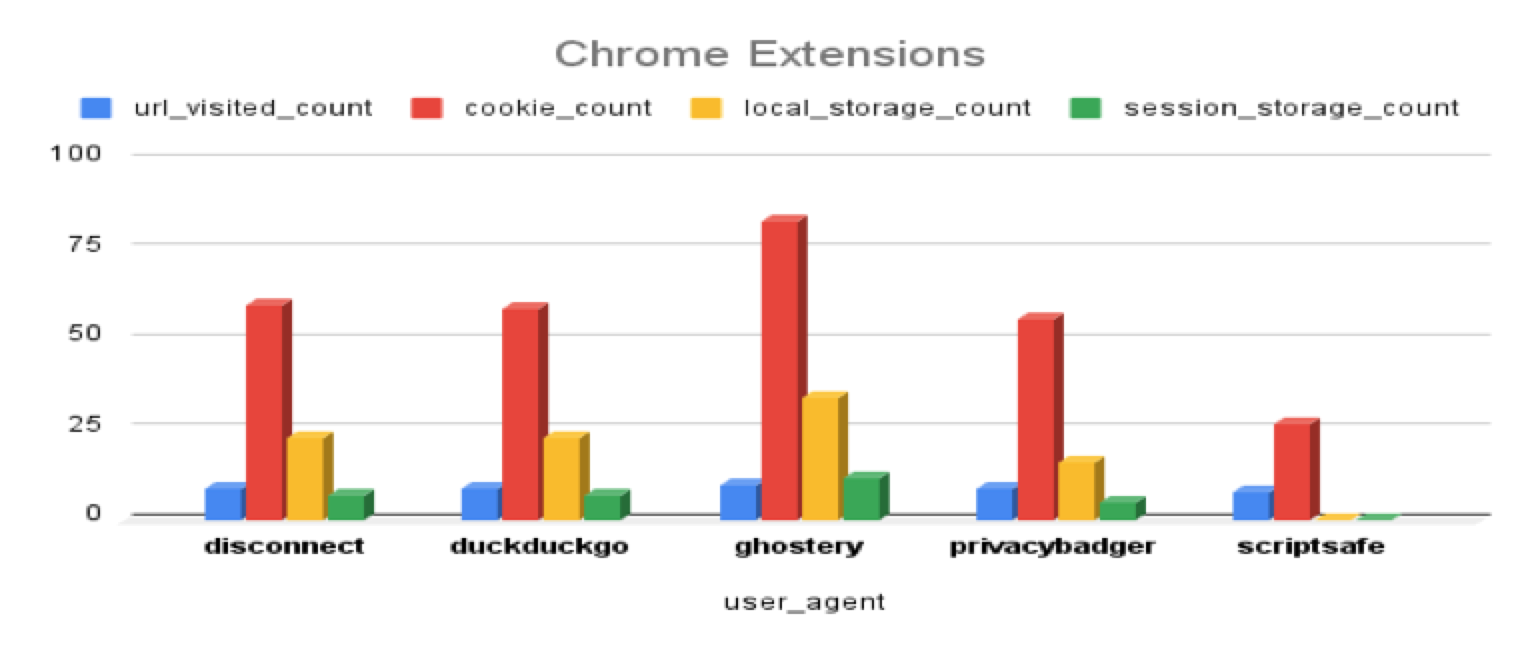

# CASE:3

A pairwise comparision of Chrome (with other Broswers one by one) to take the same key for every redirect_url visiting the pair of Broswers and then compare the corresponding 'value' that either it's same or not.

QUERY:




    -- SELECT DISTINCT i.key,
    -- CASE
    -- WHEN MIN(CASE WHEN r.user_agent = 'firefox' THEN i.value ELSE NULL END) = MIN(CASE WHEN r.user_agent = 'brave' THEN i.value ELSE NULL END) THEN 0
    -- ELSE 1
    -- END AS Value_Comparison,
    -- MIN(CASE WHEN r.user_agent = 'firefox' THEN i.value ELSE NULL END) AS Firefox_Value,
    -- MIN(CASE WHEN r.user_agent = 'brave' THEN i.value ELSE NULL END) AS Brave_Value
    -- FROM
    -- REQUESTS r
    -- INNER JOIN items i
    -- ON r.id = i.request_id
    -- WHERE
    -- i.type = 'local_storage' AND
    -- (r.user_agent = 'firefox' OR r.user_agent = 'brave')
    -- GROUP BY i.key;

This is a SQL query that retrieves data from two tables (requests and items) and aggregates the data based on the item key. The query returns the following information:

- key: the unique key of the item stored in the local storage of the browser.

- Value_Comparison: a binary value indicating whether the value of the same key stored in firefox and brave is equal (0) or not equal (1).

- Firefox_Value: the value of the key stored in firefox.

- Brave_Value: the value of the key stored in brave.

The data is filtered based on the type column to only include local storage items and the user_agent column to only include firefox and brave. The final result is grouped by the key column and returns the MIN value for the firefox and brave user agents for each key.

    -- SELECT
    -- i.type AS storage_type,
    -- SUM(CASE WHEN Value_Comparison = 'Different' THEN 1 ELSE 0 END) AS Different,
    -- SUM(CASE WHEN Value_Comparison = 'Same' THEN 1 ELSE 0 END) AS Same
    -- FROM (
    -- SELECT DISTINCT i.key, i.value, i.type,
    -- CASE
    -- WHEN MIN(CASE WHEN r.user_agent = 'chrome' THEN i.value ELSE NULL END) = MIN(CASE WHEN r.user_agent = 'brave' THEN i.value ELSE NULL END) THEN 'Same'
    -- ELSE 'Different'
    -- END AS Value_Comparison
    -- FROM
    -- REQUESTS r
    -- INNER JOIN items i
    -- ON r.id = i.request_id
    -- WHERE
    -- (r.user_agent = 'chrome' OR r.user_agent = 'brave')
    -- AND (i.type = 'cookie' OR i.type = 'local_storage' OR i.type = 'session_storage')
    -- GROUP BY i.key, i.type
    -- ) i
    -- GROUP BY i.type;


This is a SQL query that retrieves data from two tables (requests and items) and aggregates the data based on the item type. The query returns the following information:

- storage_type: the type of storage (cookie, local_storage, or session_storage).

- Different: the number of keys that have different values stored in chrome and brave.

- Same: the number of keys that have the same values stored in chrome and brave.

The inner query retrieves the key, value, type, and a binary value (Same or Different) indicating whether the value of the same key stored in chrome and brave is equal or not. The outer query aggregates the data based on the type column and returns the sum of Different and Same for each type. The data is filtered based on the user_agent column to only include chrome and brave, and the type column to only include cookie, local_storage, or session_storage.

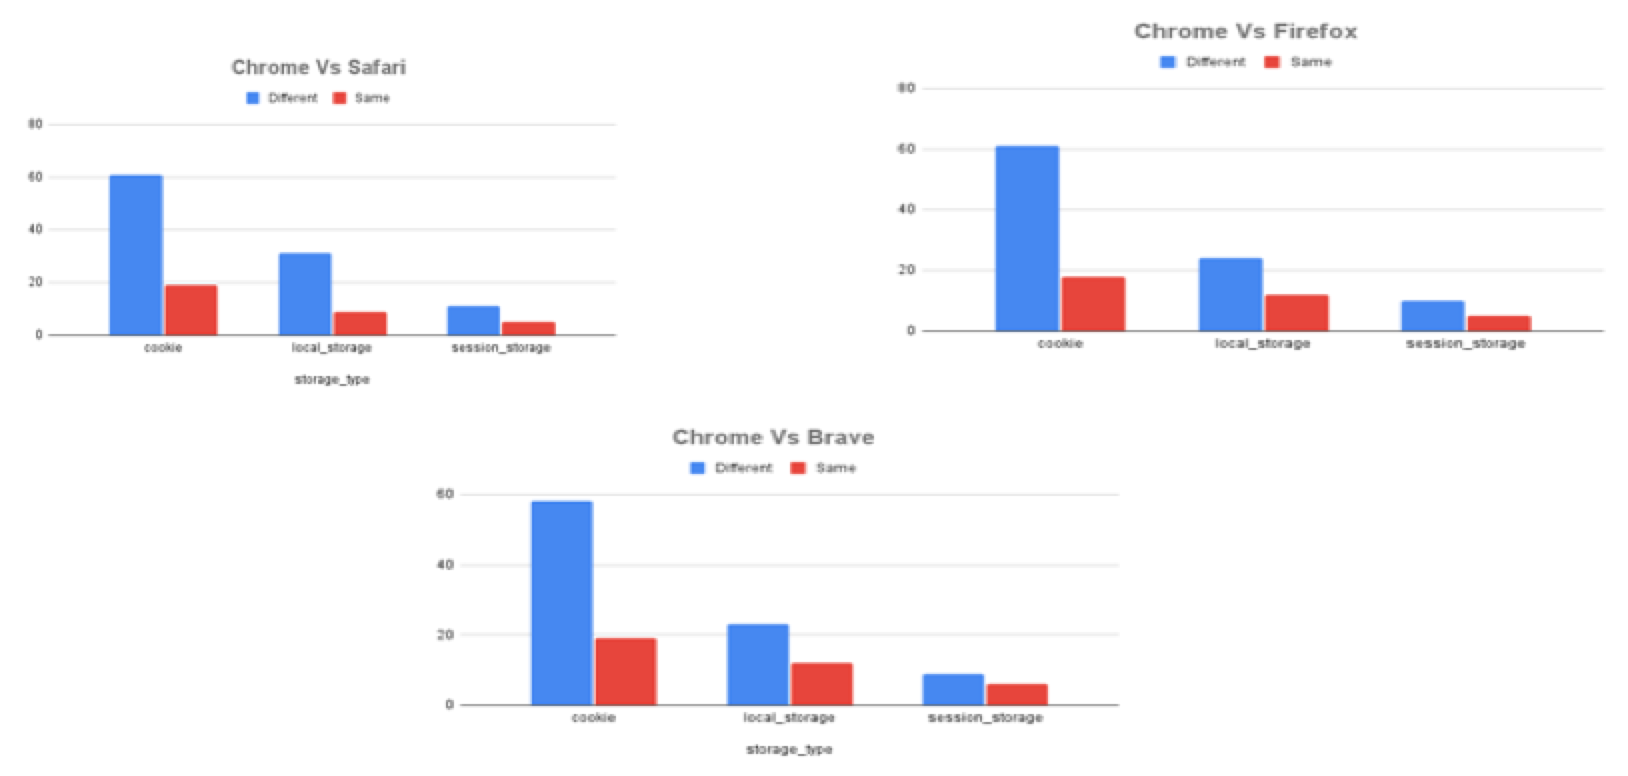

# CASE:4

A comparision of all Broswer by taking the same key in all Broswers for every DISTINCT redirect_url in case
'cookie' ,'local_storage and 'session_storage and checking that either value is same and Different

QUERY:

    - SELECT Value_Comparison, COUNT(Value_Comparison) as count
    -- FROM (
    -- SELECT DISTINCT i.key,
    -- CASE
    -- WHEN MIN(CASE WHEN r.user_agent = 'firefox' THEN i.value ELSE NULL END) = MIN(CASE WHEN r.user_agent = 'brave' THEN i.value ELSE NULL END) AND
    -- MIN(CASE WHEN r.user_agent = 'firefox' THEN i.value ELSE NULL END) = MIN(CASE WHEN r.user_agent = 'safari' THEN i.value ELSE NULL END) AND
    -- MIN(CASE WHEN r.user_agent = 'firefox' THEN i.value ELSE NULL END) = MIN(CASE WHEN r.user_agent = 'chrome' THEN i.value ELSE NULL END) THEN 'Same'
    -- ELSE 'Different'
    -- END AS Value_Comparison,
    -- MIN(CASE WHEN r.user_agent = 'firefox' THEN i.value ELSE NULL END) AS Firefox_Value,
    -- MIN(CASE WHEN r.user_agent = 'brave' THEN i.value ELSE NULL END) AS Brave_Value,
    -- MIN(CASE WHEN r.user_agent = 'safari' THEN i.value ELSE NULL END) AS Safari_Value,
    -- MIN(CASE WHEN r.user_agent = 'chrome' THEN i.value ELSE NULL END) AS Chrome_Value
    -- FROM
    -- REQUESTS r
    -- INNER JOIN items i
    -- ON r.id = i.request_id
    -- WHERE
    -- i.type = 'cookie' AND
    -- (r.user_agent = 'firefox' OR r.user_agent = 'brave' OR r.user_agent = 'safari' OR r.user_agent = 'chrome')
    -- GROUP BY i.key
    -- )
    -- GROUP BY Value_Comparison;


This SQL query is joining the requests and items tables on id and request_id respectively. It then filters the results to only include rows where the user_agent is 'firefox', 'brave', 'safari', or 'chrome', and the type of item is 'cookie'.

The query calculates the number of unique cookie keys that have the same value across all 4 browsers and the number of unique cookie keys that have different values across the 4 browsers. This is done by creating a new column Value_Comparison that has the value 'Same' when the value of the key is the same for all 4 browsers and 'Different' when the value is different for at least one of the browsers. The final result is a count of the number of keys that have 'Same' and 'Different' values.

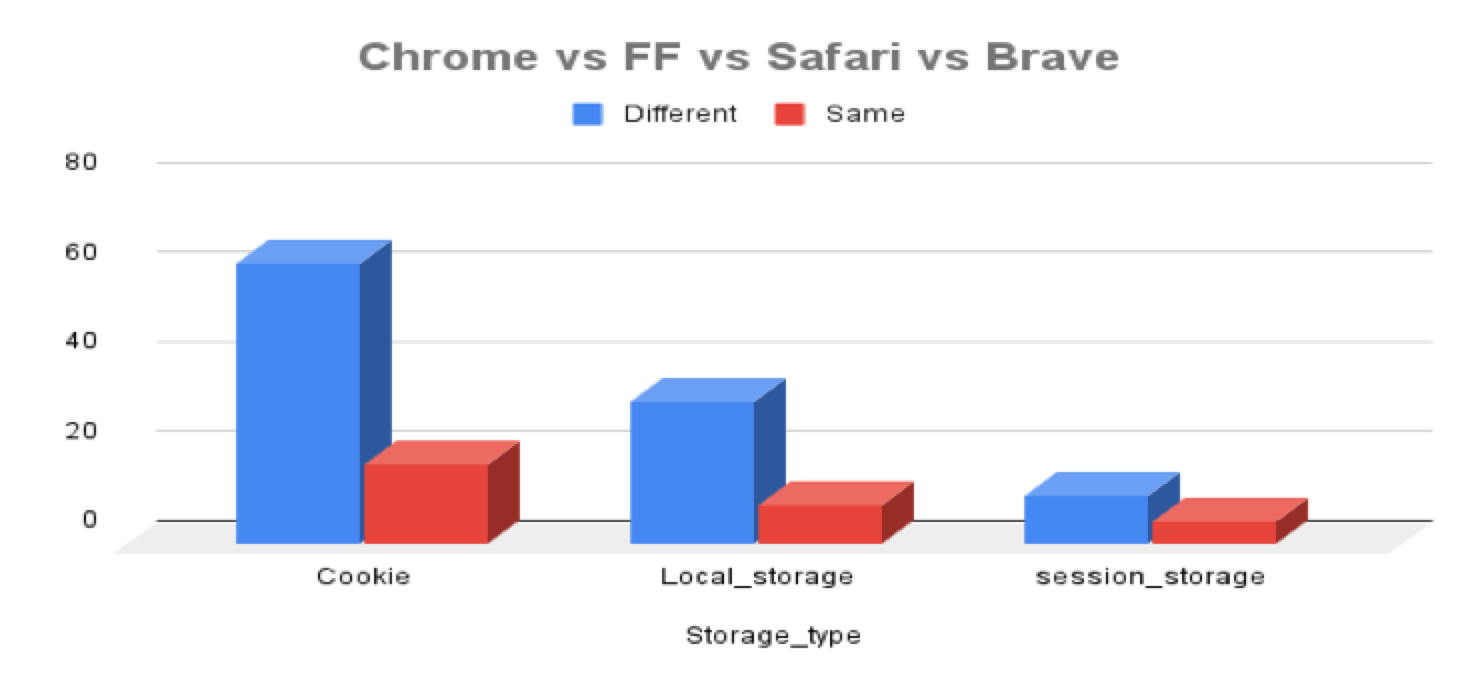

# CASE:5

  A comparision of Ghostery Extension with the rest of Extensions (Disconnect, Dockduckgo, Privacypagder, scripsafe) by taking the same key for every DISTINCT redirect_url in case 'cookie' ,'local_storage and 'session_storage and checking that either value is same and Different




QUERY:


    --     SELECT
    --     i.type AS storage_type,
    --     SUM(CASE WHEN Value_Comparison = 'Different' THEN 1 ELSE 0 END) AS Different,
    --     SUM(CASE WHEN Value_Comparison = 'Same' THEN 1 ELSE 0 END) AS Same
    --     FROM (
    --     SELECT DISTINCT i.key, i.value, i.type,
    --     CASE
    --     WHEN MIN(CASE WHEN r.user_agent = 'ghostery' THEN i.value ELSE NULL END) = MIN(CASE WHEN r.user_agent = 'disconnect' THEN i.value ELSE NULL END) THEN 'Same'
    --     ELSE 'Different'
    --     END AS Value_Comparison
    --     FROM
    --     REQUESTS r
    --     INNER JOIN items i
    --     ON r.id = i.request_id
    --     WHERE
    --     (r.user_agent = 'ghostery' OR r.user_agent = 'disconnect')
    --     AND (i.type = 'cookie' OR i.type = 'local_storage' OR i.type = 'session_storage')
    --     GROUP BY i.key, i.type
    --     ) i
    --     GROUP BY i.type;

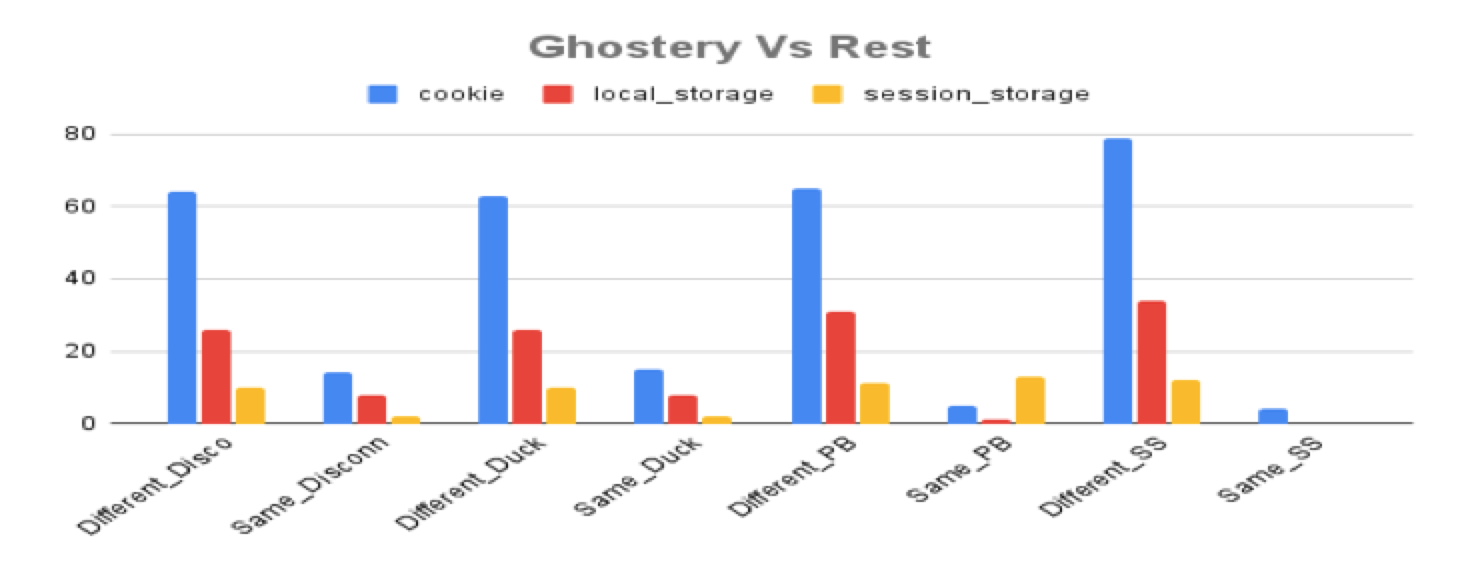

# CASE:6

  A comparision of scripsafe Extension with the rest of Extensions (Disconnect, Dockduckgo, Privacypagder, ghostery) 
    by taking the same key for every DISTINCT redirect_url in case 'cookie' ,'local_storage and 'session_storage and 
    checking that either value is same and Different



QUERY:


    --     SELECT
    --     i.type AS storage_type,
    --     SUM(CASE WHEN Value_Comparison = 'Different' THEN 1 ELSE 0 END) AS Different,
    --     SUM(CASE WHEN Value_Comparison = 'Same' THEN 1 ELSE 0 END) AS Same
    --     FROM (
    --     SELECT DISTINCT i.key, i.value, i.type,
    --     CASE
    --     WHEN MIN(CASE WHEN r.user_agent = 'scriptsafe' THEN i.value ELSE NULL END) = MIN(CASE WHEN r.user_agent = 'disconnect' THEN i.value ELSE NULL END) THEN 'Same'
    --     ELSE 'Different'
    --     END AS Value_Comparison
    --     FROM
    --     REQUESTS r
    --     INNER JOIN items i
    --     ON r.id = i.request_id
    --     WHERE
    --     (r.user_agent = 'scriptsafe' OR r.user_agent = 'disconnect')
    --     AND (i.type = 'cookie' OR i.type = 'local_storage' OR i.type = 'session_storage')
    --     GROUP BY i.key, i.type
    --     ) i
    --     GROUP BY i.type;


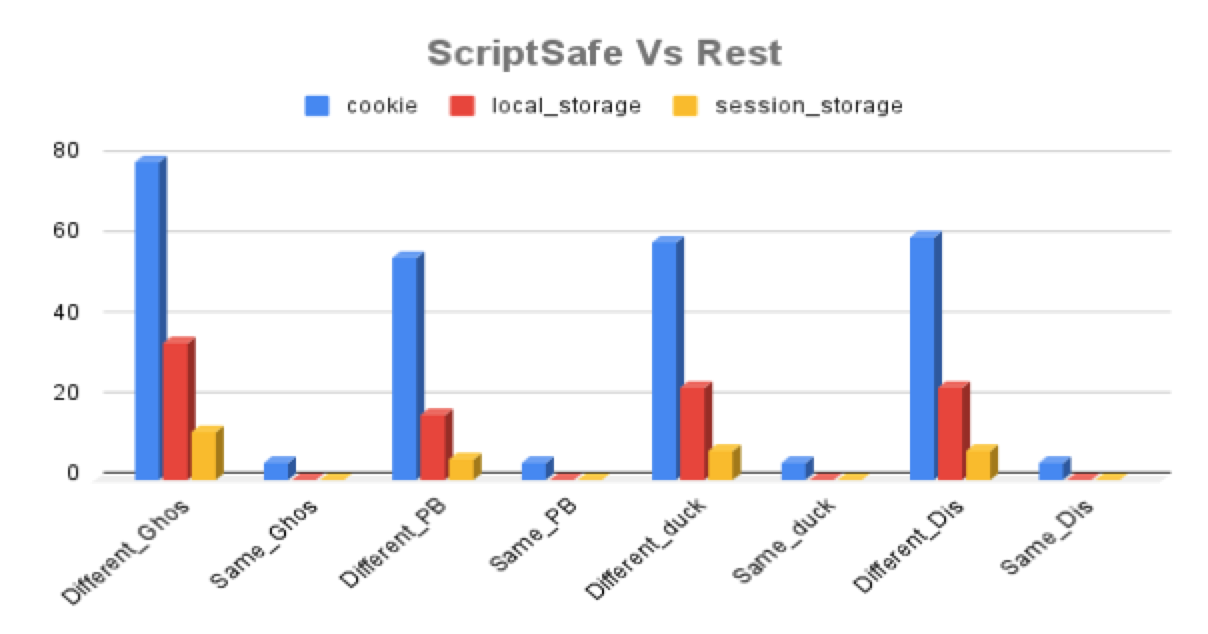

CASE:7

A comparision of all Extensions (Chrome) by taking the same key in all Extensions for every DISTINCT redirect_url in case 'cookie' ,'local_storage and 'session_storage and checking that either value is same and Different.adada


QUERY:



    -- SELECT Value_Comparison, COUNT(Value_Comparison) as count
    -- FROM (
    -- SELECT DISTINCT i.key,
    -- CASE
    -- WHEN MIN(CASE WHEN r.user_agent = 'ghostery' THEN i.value ELSE NULL END) = MIN(CASE WHEN r.user_agent = 'disconnect' THEN i.value ELSE NULL END) AND
    -- MIN(CASE WHEN r.user_agent = 'ghostery' THEN i.value ELSE NULL END) = MIN(CASE WHEN r.user_agent = 'duckduckgo' THEN i.value ELSE NULL END) AND
    -- MIN(CASE WHEN r.user_agent = 'ghostery' THEN i.value ELSE NULL END) = MIN(CASE WHEN r.user_agent = 'privacybadger' THEN i.value ELSE NULL END) AND
    -- MIN(CASE WHEN r.user_agent = 'ghostery' THEN i.value ELSE NULL END) = MIN(CASE WHEN r.user_agent = 'scriptsafe' THEN i.value ELSE NULL END) THEN 'Same'
    -- ELSE 'Different'
    -- END AS Value_Comparison,
    -- MIN(CASE WHEN r.user_agent = 'ghostery' THEN i.value ELSE NULL END) AS ghostery_Value,
    -- MIN(CASE WHEN r.user_agent = 'disconnect' THEN i.value ELSE NULL END) AS disconnect_Value,
    -- MIN(CASE WHEN r.user_agent = 'duckduckgo' THEN i.value ELSE NULL END) AS duckduckgo_Value,
    -- MIN(CASE WHEN r.user_agent = 'privacybadger' THEN i.value ELSE NULL END) AS privacybadger_Value,
    -- MIN(CASE WHEN r.user_agent = 'scriptsafe' THEN i.value ELSE NULL END) AS scriptsafe_Value
    -- FROM
    -- REQUESTS r
    -- INNER JOIN items i
    -- ON r.id = i.request_id
    -- WHERE
    -- i.type = 'cookie' AND
    -- (r.user_agent = 'ghostery' OR r.user_agent = 'disconnect' OR r.user_agent = 'duckduckgo' OR r.user_agent = 'privacybadger' OR r.user_agent='scriptsafe')
    -- GROUP BY i.key
    -- )
    -- GROUP BY Value_Comparison;

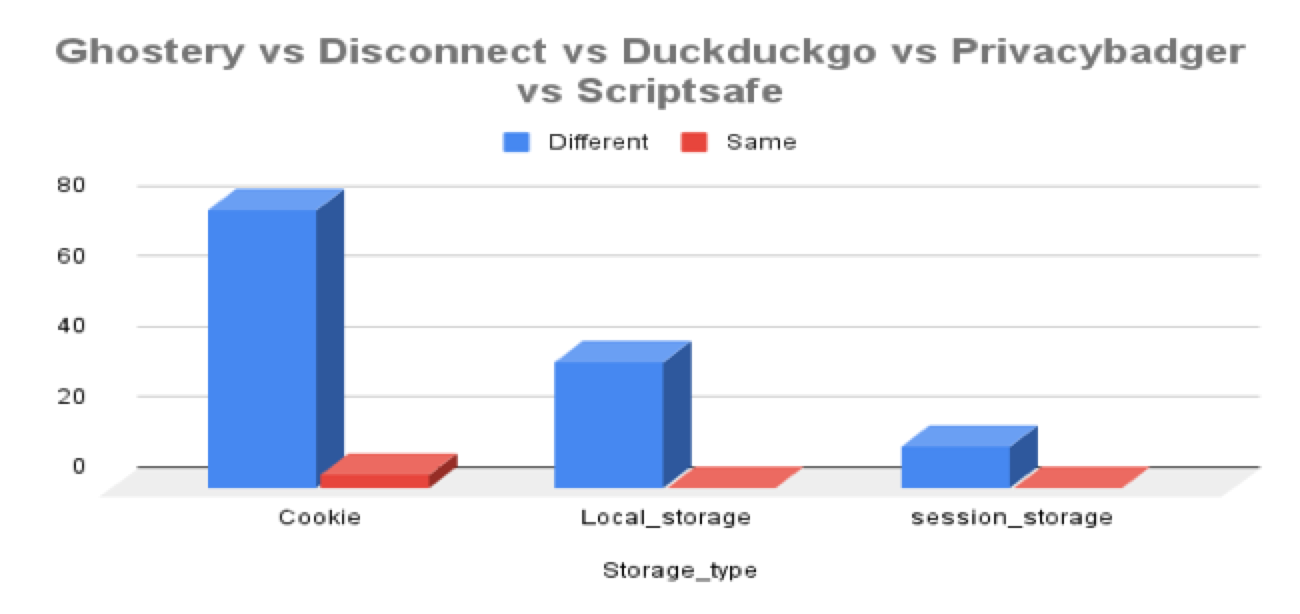

